CLUSTERING EVALUATION

In [ ]:
import sklearn
import pandas as pd
import numpy as np

from sklearn import datasets
import matplotlib.pyplot as plt

from itertools import product

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score 

GENERATE DATA

In [ ]:
# make circles dapat  digunakan untuk menghasilkan data dalam bentuk circle
X, y = datasets.make_circles(n_samples=500, noise=0.02, random_state=0)

EDA

In [ ]:
# menampilkan 5 data teratas
# X adalah data yang membentuk circles
print('Nilai X : \n', X[:5])

# sedangkan y, adlah cluster dari data tersebut
print('Nilai X : \n', y[:5])

Nilai X : 
 [[-0.64935027  0.7694619 ]
 [ 0.75723522  0.08406494]
 [ 0.55074407  0.59177894]
 [ 0.14368733 -0.7838818 ]
 [ 0.45348142 -0.71992857]]
Nilai X : 
 [0 1 1 1 1]


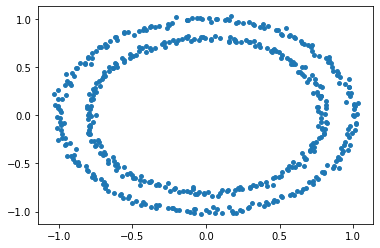

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.show()

# KMEANS Cluster

[0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0
 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0
 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1
 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1
 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0
 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1
 0 1 0 1 0 0 0 1 0 1 0 0 

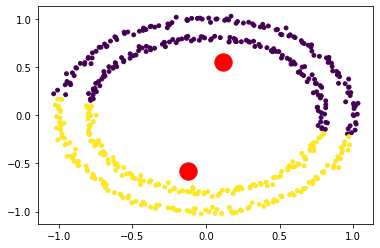

In [ ]:
kmeans_cluster = KMeans(n_clusters=2, init="k-means++", max_iter=3  00 ,n_init=10, random_state=0)

kmeans_result= kmeans_cluster.fit_predict(X)
print(kmeans_result)
plt.scatter(X[:, 0], X[:, 1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:, 0],
            kmeans_cluster.cluster_centers_[:, 1],
            s=300, c='red')

plt.show()

# DBSCAN Cluster

In [ ]:
eps_values = np.arange(0.02, 0.3, 0.01)
min_samples = np.arange(2,5)
dbscan_params = list(product(eps_values,min_samples))

In [ ]:
# list contains looping result
no_of_clusters = []
epsvalues = []
min_samp = []

# iterate over parameter combinations
for p in dbscan_params:
  # createa dbscan cluster based on a combination of parameters
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

  # no of cluster must be > 1, so if cluster <= 1 then break
  if len(np.unique(dbscan_cluster.labels_)) <= 1 :
    break
  else :
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))

  #  append values to list
  epsvalues.append(p[0])
  min_samp.append(p[1])

In [ ]:
#  create a dataframe based on the iteration results

eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min, columns=['no_of_clusters', 'epsilon_values', 'minimum_points'])
eps_min_df

,no_of_clusters,epsilon_values,minimum_points
0,99,0.02,2
1,23,0.02,3
2,2,0.02,4
3,141,0.03,2
4,64,0.03,3
5,16,0.03,4
6,110,0.04,2
7,84,0.04,3
8,58,0.04,4
9,57,0.05,2


In [ ]:
"""
karena tujuanya menghasilkan cluster == 2,
maka dapat menggunakan salah satu dari beberapa kombinasi parameter eps dan min_pts
"""
eps_min_df[eps_min_df['no_of_clusters'] == 2]

,no_of_clusters,epsilon_values,minimum_points
2,2,0.02,4
18,2,0.08,2
19,2,0.08,3
20,2,0.08,4
21,2,0.09,2
22,2,0.09,3
23,2,0.09,4
24,2,0.10,2
25,2,0.10,3
26,2,0.10,4


In [ ]:
dbscan_cluster = DBSCAN(eps=0.11, min_samples = 3)
dbscan_cluster.fit(X)

dbscan_result = dbscan_cluster.labels_

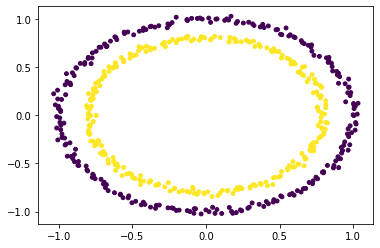

In [ ]:
plt.scatter(X[:,0], X[:,1], s=15, c=dbscan_result)
plt.show()

5. Cluster Evaluation

Davies Bouldin Index (DBI)

In [ ]:
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI KMeans Score : ',dbi_kmeans)
print('DBI DBSCAN Score : ',dbi_dbscan)

DBI KMeans Score :  1.1413660912854755
DBI DBSCAN Score :  690.8008186438688


Silhoette Score

In [ ]:
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)

print('Silhoette KMeans Score : ',sil_kmeans)
print('Silhoette DBSCAN Score : ',sil_dbscan)

Silhoette KMeans Score :  0.4009108760935593
Silhoette DBSCAN Score :  0.0183945519188842


# IMPLEMENTASI 2

In [ ]:
X,y = datasets.make_blobs(n_samples=500, centers=4, cluster_std=0.7, random_state=0)

In [ ]:
# menampilkan 5 data teratas
# X adalah data yang membentuk circles
print('Nilai X : \n', X[:5])

# sedangkan y, adlah cluster dari data tersebut
print('Nilai y : \n', y[:5])

Nilai X : 
 [[2.46023257 1.14242178]
 [3.66800921 0.15565258]
 [1.00830104 4.17275863]
 [0.16694238 4.850626  ]
 [1.14069873 2.05835514]]
Nilai y : 
 [1 1 0 0 1]


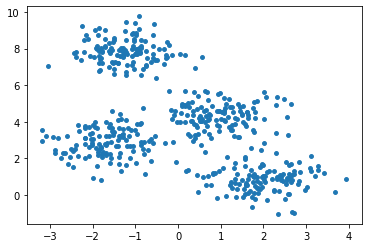

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.show()

# KMEANS Cluster

[0 0 1 1 0 3 3 1 1 2 3 0 3 2 1 1 0 1 2 1 1 0 3 2 1 2 0 3 2 3 3 3 0 3 3 0 2
 1 2 0 2 1 1 0 3 0 1 1 0 0 2 2 3 1 1 3 3 2 2 0 0 2 0 0 0 3 1 0 1 3 2 1 2 0
 2 0 3 3 1 1 2 1 2 1 1 3 2 2 0 2 2 2 0 2 1 1 0 0 0 1 2 2 0 2 1 1 3 0 1 2 2
 3 2 2 0 2 0 1 3 0 1 2 0 0 2 0 0 0 0 2 1 2 3 2 2 2 1 0 1 3 0 0 0 0 3 2 1 1
 3 2 2 0 1 1 1 3 3 0 3 1 0 1 0 0 3 3 0 1 2 3 0 2 0 3 1 2 1 2 2 2 0 0 0 1 3
 2 3 0 3 2 0 3 2 3 3 2 1 3 1 2 2 1 3 3 1 3 3 1 3 3 3 0 0 0 1 0 3 2 2 2 1 0
 3 2 3 0 2 1 2 3 3 3 3 3 1 1 1 3 2 0 0 3 3 0 2 2 1 0 1 1 1 3 0 2 1 2 2 3 2
 3 1 1 0 2 0 0 1 1 2 0 1 2 0 3 0 2 3 3 1 0 0 1 0 3 0 3 3 0 1 1 1 0 2 2 0 2
 2 2 1 0 0 2 1 2 0 0 3 2 2 1 2 1 0 1 2 3 2 3 3 1 1 1 3 3 2 0 1 3 2 0 1 1 0
 0 3 0 3 3 1 3 2 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 2 0 1 2 2 3 1 0 0 3 3 0 3 2
 1 1 1 2 1 3 1 2 2 1 2 2 3 2 2 3 3 3 3 2 2 2 2 0 2 0 1 0 2 1 0 1 0 1 3 3 2
 1 2 3 1 0 2 3 1 0 2 3 3 1 0 1 0 3 0 1 0 2 3 0 2 0 1 3 1 3 0 2 1 1 3 0 0 1
 1 3 1 3 2 0 3 0 2 3 3 3 2 3 1 2 3 3 3 3 3 1 2 0 3 0 1 0 3 2 1 2 3 2 1 2 1
 3 3 2 3 3 3 2 0 3 3 2 1 

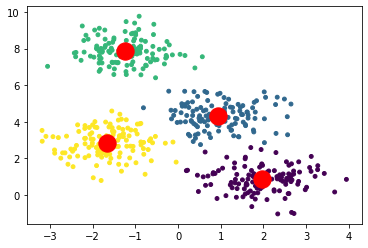

In [ ]:
kmeans_cluster = KMeans(n_clusters=4, init="k-means++", max_iter=300 ,n_init=10, random_state=0)

kmeans_result= kmeans_cluster.fit_predict(X)
print(kmeans_result)
plt.scatter(X[:, 0], X[:, 1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:, 0],
            kmeans_cluster.cluster_centers_[:, 1],
            s=300, c='red')

plt.show()

# DBSCAN

In [ ]:
eps_values = np.arange(0.01, 0.01, 0.01)
min_samples = np.arange(2,5)
dbscan_params = list(product(eps_values,min_samples))

In [ ]:
# list contains looping result
no_of_clusters = []
epsvalues = []
min_samp = []

# iterate over parameter combinations
for p in dbscan_params:
  # createa dbscan cluster based on a combination of parameters
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

  # no of cluster must be > 1, so if cluster <= 1 then break
  if len(np.unique(dbscan_cluster.labels_)) <= 1 :
    break
  else :
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))

  #  append values to list
  epsvalues.append(p[0])
  min_samp.append(p[1])

In [ ]:
#  create a dataframe based on the iteration results

eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min, columns=['no_of_clusters', 'epsilon_values', 'minimum_points'])
eps_min_df

,no_of_clusters,epsilon_values,minimum_points


In [ ]:
"""
karena tujuanya menghasilkan cluster == 2,
maka dapat menggunakan salah satu dari beberapa kombinasi parameter eps dan min_pts
"""
eps_min_df[eps_min_df['no_of_clusters'] == 2]

,no_of_clusters,epsilon_values,minimum_points


In [ ]:
dbscan_cluster = DBSCAN(eps=0.11, min_samples = 3)
dbscan_cluster.fit(X)

dbscan_result = dbscan_cluster.labels_

In [ ]:
dbscan_cluster = DBSCAN(eps=0.11, min_samples = 3)
dbscan_cluster.fit(X)

dbscan_result = dbscan_cluster.labels_

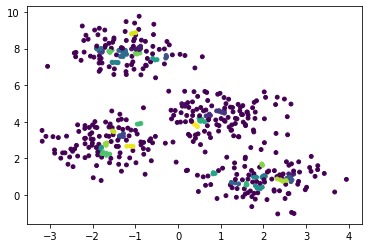

In [ ]:
plt.scatter(X[:,0], X[:,1], s=15, c=dbscan_result)
plt.show()

In [ ]:
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI KMeans Score : ',dbi_kmeans)
print('DBI DBSCAN Score : ',dbi_dbscan)

DBI KMeans Score :  0.5120623635610269
DBI DBSCAN Score :  1.6704822840982911


In [ ]:
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)

print('Silhoette KMeans Score : ',sil_kmeans)
print('Silhoette DBSCAN Score : ',sil_dbscan)

Silhoette KMeans Score :  0.6322199807775134
Silhoette DBSCAN Score :  -0.44036145866471293
